# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Проведение исследование будет состоять из следующих этапов:
1. **Предварительное изучение исходных данных.**
   * Изучение общей информации об имеющемся датафрейме.
   * Постройка гистограмм по столбцам с числовыми значениями.
2. **Предобработка данных:**
    * Поиск и изучение пропусков:
        * определение столбцов с пропусками;
        * заполнение пропущенных значений;
        * описание возможных причин появления пропусков.
    * Обработка типов данных в столбцах:
        * поиск столбцов, требующих изменения типов данных;
        * изменение типов данных;
        * описание причин, в связи с которыми потребовалась замена данных.
    * Изучение столбца с названиями населенных пунктов и поиск неявных дубликатов.
3. **Расчет дополнительных данных, необходимых для проведения исследования:**
    * Цена одного квадратного метра.
    * День недели публикации объявления.
    * Месяц публикации объявления.
    * Год публикации объявления.
    * Тип этажа квартиры (значения — «первый», «последний», «другой»).
    * Расстояние до центра города в километрах.
4. **Проведение исследовательского анализа данных:**
   * Изучение данных, постройка гистограмм, обработка аномальных значений и удаление выбросов для следующих параметров:
       * общая площадь;
       * жилая площадь;
       * площадь кухни;
       * цена объекта;
       * количество комнат;
       * высота потолков;
       * тип этажа квартиры;
       * общее количество этажей в доме;
       * расстояние до центра города в метрах;
       * расстояние до ближайшего парка.
   * Оценка скорости продажи квартир:
       * Построение гистограммы;
       * Расчет среднего и медианы;
       * Описание типичного времени продажи, а также времени "быстрых" и аномально долгих продаж.
   * Описание факторов, в наибольшей степени влияющих на общую (полную) стоимость объекта, построение графиков, демонстрирующих зависимость:
       * общая площадь;
       * жилая площадь;
       * площадь кухни;
       * количество комнат;
       * этаж, на котором расположена квартира (первый, последний, другой);
       * дата размещения (день недели, месяц, год).
   * Расчет средней цены за один квадартный метр для 10 наиболее популярных городов. Выделение городов с самой выской и самой низкой ценой.
   * Влияние удаленности от центра города на цену за квадратный метр для квартир, расположенных в Санкт_петербурге:
       * расчет средней цены для каждого километра от центра города;
       * построение графика, показывающего зависимость цены от удаленности.
5. **Общий вывод по исследованию.**
   

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd 
import matplotlib as plt 

In [2]:

try:
    data = pd.read_csv('', sep = '\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep = '\t')

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
(data.isna().sum()/len(data)).sort_values(ascending=False) 

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

### ОПИСАНИЕ ИСХОДНЫХ ДАННЫХ

В представленном датафрейме 22 столбца:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м). Содержит 18 157 non-null значений в формате "число с плавающей точкой" (float64).
- `balcony` — число балконов. Содержит 12 1180 non-null значений в формате "число с плавающей точкой" (float64).
- `ceiling_height` — высота потолков (м). Содержит 14 504 non-null значений в формате "число с плавающей точкой" (float64).
- `cityCenters_nearest` — расстояние до центра города (м). Содержит 18 180 non-null значений в формате "число с плавающей точкой" (float64).
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия). Содержит 20 518 non-null значений в формате "число с плавающей точкой" (float64).
- `first_day_exposition` — дата публикации. Содержит 23 699 non-null значений в формате object.
- `floor` — этаж. Содержит 23 699 non-null значений в формате "целочисленное число" (int64).
- `floors_total` — всего этажей в доме. Содержит 23 613 non-null значений в формате "число с плавающей точкой" (float64).
- `is_apartment` — апартаменты (булев тип). Содержит 2 775 non-null значений.
- `kitchen_area` — площадь кухни в квадратных метрах (м²). Содержит 21 421 non-null значений в формате "число с плавающей точкой" (float64).
- `last_price` — цена на момент снятия с публикации. Содержит 23 699 non-null значений в формате "число с плавающей точкой" (float64).
- `living_area` — жилая площадь в квадратных метрах (м²). Содержит 21 796 non-null значений в формате "число с плавающей точкой" (float64).
- `locality_name` — название населённого пункта. Содержит 23 650 non-null значений в формате (object).
- `open_plan` — свободная планировка (булев тип). Содержит 23 699 non-null значений.
- `parks_around3000` — число парков в радиусе 3 км. Содержит 18 181 non-null значений в формате "число с плавающей точкой" (float64).
- `parks_nearest` — расстояние до ближайшего парка (м). Содержит 8 079 non-null значений в формате "число с плавающей точкой" (float64).
- `ponds_around3000` — число водоёмов в радиусе 3 км. Содержит 18 181 non-null значений в формате "число с плавающей точкой" (float64).
- `ponds_nearest` — расстояние до ближайшего водоёма (м). Содержит 9 110 non-null значений в формате "число с плавающей точкой" (float64).
- `rooms` — число комнат. Содержит 23 699 non-null значений в формате "целочисленное число" (int64).
- `studio` — квартира-студия (булев тип). Содержит 23 699 non-null значений.
- `total_area` — общая площадь квартиры в квадратных метрах (м²). Содержит 23 699 non-null значений в формате "число с плавающей точкой" (float64).
- `total_images` — число фотографий квартиры в объявлении. Содержит 23 699 non-null значений в формате  "целочисленное число" (int64).

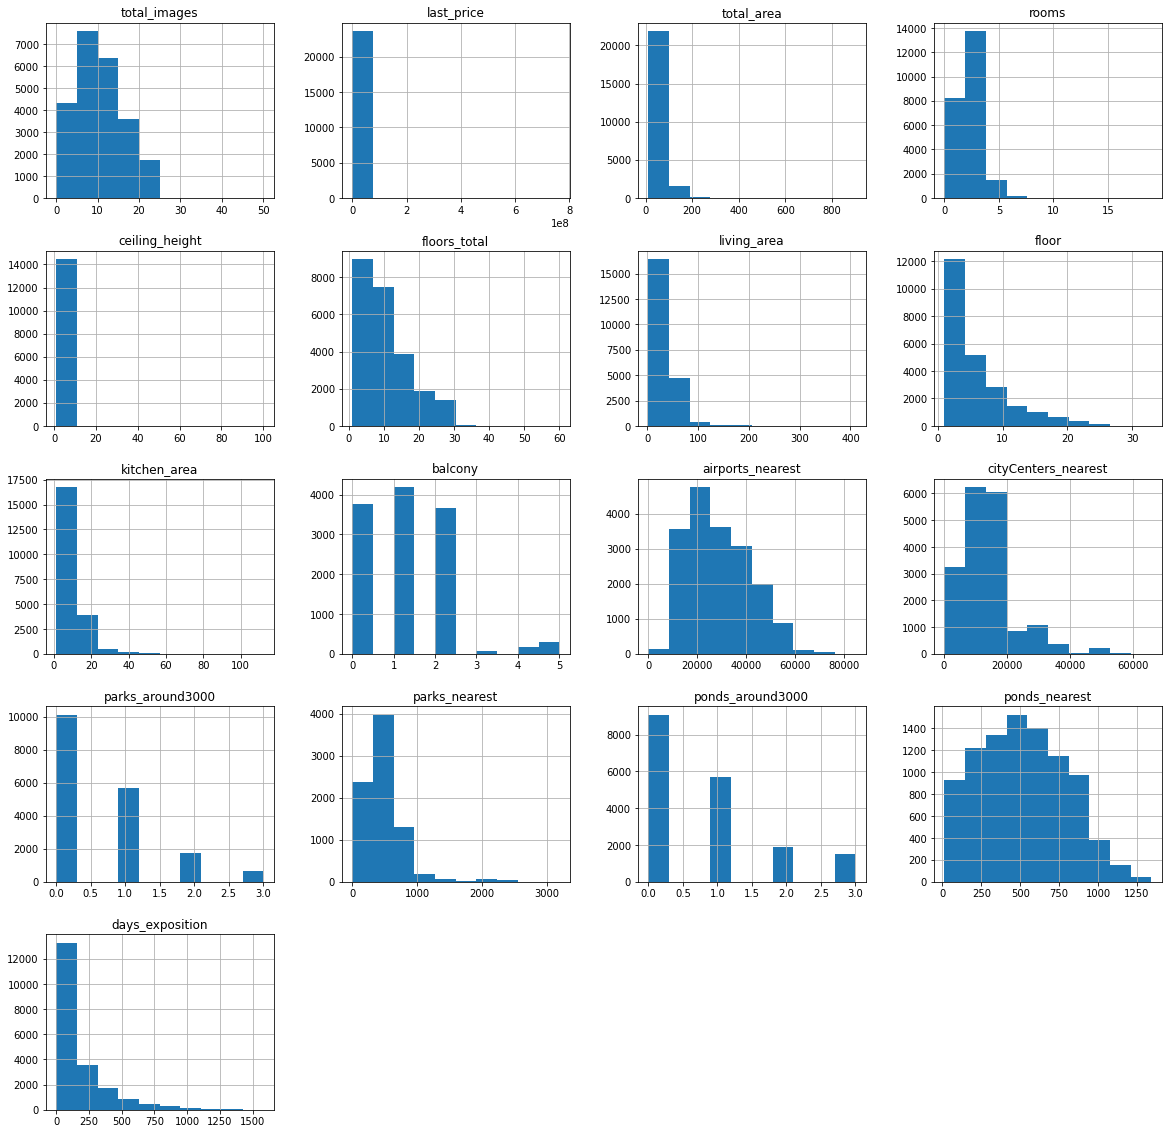

In [6]:
data.hist(figsize=(20,20)); 


**Первичная оценка гистограмм**
- `airports_nearest` — Основаня масса квартир расположена на расстоянии от 10 до 30 километров от аэропорта. Квартир на расстоянии больше 60 километров от аэропорта меньше 100. Также всего лишь около 200 квартир находится на расстоянии менее 10 километров от аэропорта. Однако почти у четверти объявлений отстутсвует информация об удаленности от аэропорта. Это значительная доля, которая может повлиять на итоговое распределение.
- `balcony` — Подавляющее большинство квартир имеет 1 или 2 балкона или не имеет балкон вовсе (примерно поровну для каждой категории с небольшим преимуществом квартир с 1 балконом). Не более 100-150 квартир имеют 3 балкона, примерно 200 квартир с 4 балконами и ориентировочно 300 квартир с 5 балконами. Доля объявлений без информации о балконах составляет практически половину от всех объявлений. Однако можно предположить, что это означает отсутствие балкона в квартире.
- `ceiling_height` — Гистограмма получилась неинформативной, так как все значения оказались в одной корзине 0-10 м. Вероятно есть малочисленные выбросы, которые повлияли на формирование гистограммы, однако их количество настолько невелико, что эти выбросы не видны на графике. Также более трети объявлений не содержат информации о высоте потолков. Однако ценность этого показателя в целом однозначно не ясна. Так как при поиске квартиры людей далеко не всегда интересует высота потолков.
- `cityCenters_nearest` — Большинство квартир расположено в пределах 20 километров от центра города (более 15 000 объявлений). В диапозоне от 20 до 40 километров от центра расположено также значительное количество квартир (примерно 2 500 объявлений), однако уже в разы меньше, чем в пределах 20 километров от центра. В диапазоне от 40 до 60 километров от центра квартир уже практически нет, за исключением всплеска, соответствующему примерно 50 километрам от центра. Это может быть связано, что в 50 километрах от центра расположен относительно большой город/район. Около четверти всех объявлений представлены без информации об удаленности от центра.
- `days_exposition` — Данная гистограмма также искажена выбросами (объявления, которые висят на сайте более двух лет). В связи с этим почти 14 000 объявлений попали в одну корзину. Необходимо рассмотреть эти данные на гистограмме с большим количеством корзин. Также чуть менее 15% от всех объявлений не имеют информации о количестве  дней от момента публикации до момента снятия с публикации. В таком случае можно предположить, что эти объявления всё ещё размещены на сайте, соответственно момент снятия с публикации для них не наступил, либо отсутствие данной информации связано с каким-либо сбоем в информационных системах.
- `floor` — Наиболее распространены квартиры, расположенные не выше 10 этажа. Намного меньше квартир, расположенных в диапазоне между 10 и 20 этажами. Квартир, расположенных выше 20 этажа всего несколько сотен. Квартир выше 30 этажа нет. Данные об этаже, на котором расположена квартира представлены во всех без исключения объявлениях.
- `floors_total` — Распределение общего количества этажей в домах, в которых размещены квартиры, в целом совпадает с распределением, представленным в гистограмме `floor`, что в целом соответствует действительности: в Санкт-Петербурге преобладают дома с количеством этажей не больше 10, будь то исторический центр города или советская застройка окраин. Однако большинство современных домов имеют больше 10 этажей, поэтому доля объявлений в таких домах также заметна. Незначительная доля объявлений не имеют информации об этажности дома. Это может быть связано с тем, что кому-то не пришло в голову указать этот параметр в объявлении.
- `kitchen_area` — Данная гистограмма также получилась не совсем информативной. Подавляющее большинство кухонь попало в две первые корзины (0-10 м² и 10-20 м²). Ещё около 500 квартир попали в диапазон от 20 до 40 м². Кухни такой площади гипотетически могут быть в элитном жилье, либо в квартирах с европланировкой, где кухня и комната объединены в одно помещение. Также есть незначительное количество кухонь с площадью более 40 м², скорее всего это уже ошибка при вводе информации (вместо 5 м² написали 50 м).
- `last_price` — Данная гистограмма подверглась критическому искажению: более 23 000 (то есть практически все) объявлений попали в первую корзину, что указывает на какой-то очень большой выброс, который исказил данные. Диапазон границ корзин (шаг равен 100 000 000 то есть сто миллиардов рублей) также указывает на выброс. С чем бы ни был связан этот выброс: продажей уникальной квартиры, шуткой или мошенничеством, для целей исследования такие объявления не подходят либо их нужно рассмтатривать отдельно.
- `living_area` — Большие эксклюзивные квартиры исказили гистограмму по данному столбцу. Более 20 000 квартир попали в две первые корзины (до ~75 м²). Метраж имеет большое значение в ценообразовании, поэтому для этого столбца потребуется более точные графики. Также стоит обратить внимание, что значения начинаются с нуля. Жилая площадь квартиры врядли может быть равна 0. 
- `parks_around3000` — Данные распределены в диапазоне от 0 до 3 парков в радиусе 3 километров от квартиры. Корректнее будет рассматривать эти данные, используя целые числа, так как в радиусе 3 километров от дома не может быть 1.5 парка - только целое число. Также около четверти объявлений размещены без указанной информации.
- `parks_nearest` — Обращает на себя внимание очень большая доля пустых значений - практически 2/3 от всех объявлений. Скорее всего это связано с тем, что картографическая система не указывает расстояние до ближайшего парка, если оно больше определенного значения. Необходимо рассмотреть эти данные внимательнее с целью подтверждения или опровержения данной гипотезы. Большинство квартир, для которых данная информация указана, расположены в пределах 1 километра от ближайшего парка. К расстоянию от парка в 3 километра колиечство объявлений практически сравнивается с нулем.
- `ponds_around3000` — Ситуация аналогична `parks_around3000`. Данные распределены в диапазоне от 0 до 3 водоемов в радиусе 3 километров от квартиры. Корректнее будет рассматривать эти данные, используя целые числа, так как в радиусе 3 километров от дома не может быть 1.5 водоема - только целое число. Также около четверти объявлений размещены без указанной информации.
- `ponds_nearest` — Также крайне большая доля пустых значений - чуть меньше 2/3 от всех объявлений. Скорее всего ситуация аналогична с `parks_nearest`. Необходимо рассмотреть эти данные внимательнее с целью подтверждения или опровержения гипотезы о предельном расстоянии.
- `rooms` — Подавляющие число квартир имеет не более 4 комнат, также есть небольшая доля квартир с 5 и 6 комнатами. Квартир с 7 и более комнатами исчезающе мало. Также стоит обратить внимание на то, что значения начинаются с нуля. Необходимо разобраться с чем это связано. Возможно люди указывают 0 комнат в объявлениях про студии.
- `total_area` — Ситуация схожа с `living_area` гистограмма искажена квартирами с общим метражом более 200 м². Однако в отличии от `living_area` метраж не начинается с нуля, что говорит в пользу достоверности данных.
- `total_images` — В основном люди прикладывают к объявлению от 5 до 25 фотографий. Также велика доля объявлений без фотографий. Есть исключительные случаи, когда в объявлении прикреплено более 25 фотографий.

### Предобработка данных

In [7]:
data.isna().sum().sort_values(ascending=False) # Выведем количество пустых значений в каждом столбце.


is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [8]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

In [10]:
data.groupby('is_apartment')['is_apartment'].count() 


is_apartment
False    2725
True       50
Name: is_apartment, dtype: int64

Количество объявлений с отметкой о том, что продаются апартаменты, минимально - всего 50. Более 20 000 объявлений имеют пустое значение в данной графе, поэтому удалить строки с пустым значением не представляется возможным. Также, учитывая, что данное поле заполняется вручную продавцом, можно предположить, что незаполнение данной графы соответствует значению False, то есть данные объявления о продаже квартир, а не апартаментов. Следовательно, можно заменить NaN на False.

In [11]:
data['is_apartment'].isna().fillna(False) # Заменим пустые значения на False
data['is_apartment'].isna().sum() # Проверим, что пустых значений не осталось.


20924

При дальнейшем рассмотрении пустых значений можно заметить, что в столбцах `parks_around3000` и `ponds_around3000` количество пустых значений совпадает (5518 пустых значений в каждом из столбцов). Так как эти данные заполняются автоматически из картографичксой системы, можно предположить, что данные для 5518 объявлений не подгрузились в связи со сбоем в системе.

In [12]:
data.query('parks_around3000.isna() and parks_around3000 in ponds_around3000') 


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,NaN,...,5.50,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Действительно, все 5518 объявлений без информации о ближайших парках, также не имеют информации о ближайших водоемах.
При беглом взгляде на таблицу бросается в глаза, что также нет информации и по другим параметрам, возвращаемым из картографической системы. Стоит проверить, для всех ли объявлений из полученного среза отсутствует информации по другим "картографическим" параметрам. Уточним наш срез.

In [13]:
data.query('parks_around3000.isna() \
                and parks_around3000 in parks_nearest \
                and parks_around3000 in cityCenters_nearest \
                and parks_around3000 in airports_nearest \
                and parks_around3000 in ponds_nearest')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,NaN,...,5.50,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Гипотеза подтвердилась. Для 5518 объявлений все картографические парметры не подгрузились. Коллегам, занимающимся переносом картографических параметров на площадку по продаже квартир, необходимо обратить внимание на данные в датафрейме выше.

Удаление более 5 500 объявлений может негативно сказаться на результатах последующего анализа, а заполнять картографические значения нулем или средним/медианным значением некорректно, поэтому оставим пустое значение.

В столбцах `cityCenters_nearest` и `airports_nearest` пустых значений незначительно больше (5519 и 5542 пустых значения соответственно), относительно общего объема данных эти единичные случаи являются минимальными и не окажут влияния на дальнейший анализ.

Однако столбцы `parks_nearest` и `parks_nearest` имеют большой объем пустых значений даже, если исключить пустые значения, вызванные ошибкой в выгрузке картографических данных.

In [14]:
len(data.query('parks_nearest.isna()')) - len(data.query('parks_nearest.isna() and parks_around3000.isna()'))


10102

In [15]:
len(data.query('ponds_nearest.isna()')) - len(data.query('ponds_nearest.isna() and ponds_around3000.isna()'))


9071

Ранее нами была высказана гипотеза, что если от квартиры до ближайшего парка/водоема слишком большое расстояние, то в соответствующие столбцы возвращается пустое значение.

In [16]:
data.query('parks_nearest.isna() and parks_around3000 == 0') 


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.6,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.6,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.0,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,...,15.0,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0


In [17]:
data.query('ponds_nearest.isna() and ponds_around3000 == 0')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.6,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.6,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.0,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,...,15.0,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0


Из полученных результатов видно, что у всех объявлений, у которых в графе с информацией о ближайшем парке/водоеме стоит пустое значение, не связанное с ошибкой в картографической системе, в графе с информацией о количестве парков/водоемов в радиусе 3 километров стоит значение 0. Это подтверждает гипотезу о том, что для объявлений о квартирах, от которых до ближайшего парка/водоема слишком далеко, возвращается пустое значение. Оставим пустое значение, так как заполнять информацию о расстоянии нулем, медианным/средним значением некорректно, а удаление такого количества строк повлияет на дальнейший анализ.

В столбце `balcony` у нас 11519 пропусков. Однако, можно предположить, что это квартиры, в которых нет балкона, поэтому соответствующая графа была пропущена. Заменим пустые значения на ноль.

In [18]:
data['balcony'] = data['balcony'].fillna(0) 

In [19]:
data['balcony'].isna().sum() 

0

В столбце `ceiling_height` у нас 9195 пропусков. Высота потолков в среднем одинаковая, поэтому можно заменить пустые значения средним значением. Однако на гистаграмме мы видели выброс, который может оказать влияние на среднее значение. сравним медиану и среднее значение высоты потолков.

In [20]:
data['ceiling_height'].mean() 

2.77149889685604

In [21]:
data['ceiling_height'].median() 

2.65

Разница равна чуть более 12 сантиметров. Лучше взять медиану

In [22]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


In [23]:
data['ceiling_height'].isna().sum()


0

In [24]:
data['ceiling_height'].mean() 

2.724358411747331

В столбцах `kitchen_area` и `living_area` также есть пропущенные значения. Однако можно предположить, что разброс в площади разных кухонь и жилых пространств может быть значительно больше чем у высоты потолков. В таком случае заполнение пропусков средним или медианным значением будет некорректно. Посмотрим стандартное отклонение для этих столбцов.

In [25]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [26]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Стандартное отклонение составляет практически 6 метров для кухни и 22 метра для жилой площади - это очень много. Заменив пропуски средним значением или медианой, мы можем получить большой объем неправдоподбных  данных. Лучше оставить пропуски незаполненными.

Мы предположили, что пропуски в столбце `days_exposition` соответствуют объявлениям, которые на момент выгрузки были актуальными. Однако данная гипотеза требует подтверждения у специалистов, занимавшихся выгрузкой. Однако так как природа отсутствия количества дней активности объявления на момент его снятия неясна, то лучше оставить пропуски.

Пропуски в столбцах `floors_total` и `locality_name` крайне малочислены. В столбце `locality_name` заменить пропуски можно на фразу "Не указано", а в `floors_total` числовым значением, которое ни с чем нельзя будет спутать, например на ноль.

In [27]:
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'].isna().sum()

0

In [28]:
data['locality_name'] = data['locality_name'].fillna('Не указано')

In [29]:
data.isna().sum().sort_values(ascending=False).to_frame()

,0
is_apartment,20924
parks_nearest,15620
ponds_nearest,14589
airports_nearest,5542
cityCenters_nearest,5519
ponds_around3000,5518
parks_around3000,5518
days_exposition,3181
kitchen_area,2278
living_area,1903


**РАССМОТРЕНИЕ ТИПОВ ДАННЫХ СТОЛБЦОВ**

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

При оценке типов данных столбцов обнаружено, что некоторые типы данных предпочтительнее изменить, а именно:
- `first_day_exposition` - необходимо перевести данные в формат datetime;
- `floors_total` - количество этажей всегда равно целому числу. Формат int здесь будет более предпочтительным;
- `balcony` - количество балконов всегда целое число. Формат int здесь будет более предпочтительным;
- `parks_around3000`, `ponds_around3000` и `days_exposition` - в данных столбцах также наиболее уместно был бы тип данных int, однако из-за наличия пустых значений в этих столбцах изменить тип данных нельзя. Поэтому оставим float.

**`first_day_exposition`**

In [31]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%d %H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

**`floors_total`**

In [32]:
data['floors_total'] = data['floors_total'].astype('int')

**`balcony`**

In [33]:
data['balcony'] = data['balcony'].astype('int')

**Поиск дубликатов в столбце `locality_name`**

In [34]:
len(data['locality_name'].unique())

365

In [35]:
def renaming(old,new):
    no_duplicates = []
    for elem in data['locality_name']:
        if old in elem:
            elem = elem.replace(old, new)
            no_duplicates.append(elem)
        else:
            no_duplicates.append(elem)
    data['locality_name'] = no_duplicates

In [36]:
renaming('ё','е')

In [37]:
len(data['locality_name'].unique())

331

In [38]:
renaming('городской поселок','поселок')

In [39]:
len(data['locality_name'].unique())

331

In [40]:
renaming('поселок городского типа','поселок')

In [41]:
len(data['locality_name'].unique())

323

In [42]:
len(data['locality_name'].str.lower().unique())

323

In [43]:
renaming('деревня Кудрово','Кудрово')

#### check name

In [44]:
# check
data.locality_name.nunique()

322

In [45]:

data.duplicated().sum()

0

In [46]:
data["last_price"] = data['last_price'].astype('int')

### Посчитайте и добавьте в таблицу новые столбцы

**ЦЕНА ЗА МЕТР КВАДРАТНЫЙ**

In [47]:
data['price_per_meter'] = (data['last_price']/data['total_area']).round(2)
data['price_per_meter'].to_frame()

,price_per_meter
0,120370.37
1,82920.79
2,92785.71
3,408176.10
4,100000.00
...,...
23694,72490.85
23695,52542.37
23696,44091.71
23697,149511.40


**ДЕНЬ НЕДЕЛИ ПРОДАЖИ**

In [48]:
data['sale_weekday'] = data['first_day_exposition'].dt.weekday
data['sale_weekday'].to_frame()

,sale_weekday
0,3
1,1
2,3
3,4
4,1
...,...
23694,1
23695,0
23696,6
23697,1


**МЕСЯЦ ПРОДАЖИ**

In [49]:
data['sale_month'] = data['first_day_exposition'].dt.month
data['sale_month'].to_frame()

,sale_month
0,3
1,12
2,8
3,7
4,6
...,...
23694,3
23695,1
23696,2
23697,3


**ГОД ПРОДАЖИ**

In [50]:
data['sale_year'] = data['first_day_exposition'].dt.year
data['sale_year'].to_frame() 

,sale_year
0,2019
1,2018
2,2015
3,2015
4,2018
...,...
23694,2017
23695,2018
23696,2018
23697,2017


**ТИП ЭТАЖА**

Для осуществления последующих исследований целесообразнее всего будет закодировать типаж этажа, поэтому при создании столбца с типом этажа будут использована следующая кодировка:

- "первый - `0`
- "второй" - `1`
- "другой" -`2`

In [51]:
def flor_type_func(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 0
    elif floor == floors_total:
        return 1
    elif floor <= 0 :
        return 'Невозможное значение!'
    else:
        return 2


In [52]:
data['floor_type'] = data.apply(flor_type_func, axis=1)
data['floor_type'].value_counts().to_frame()

,floor_type
2,17446
1,3336
0,2917


**РАССТОЯНИЕ ДО ЦЕНТРА В КИЛОМЕТРАХ**

In [53]:
data['km_to_center'] = (data['cityCenters_nearest']/1000).round(0)
data['km_to_center'].to_frame()

,km_to_center
0,16.0
1,19.0
2,14.0
3,7.0
4,8.0
...,...
23694,4.0
23695,NaN
23696,NaN
23697,10.0


### Проведите исследовательский анализ данных

**5.1 ИЗУЧЕНИЕ ПАРАМЕТРОВ**

**ОБЩАЯ ПЛОЩАДЬ**

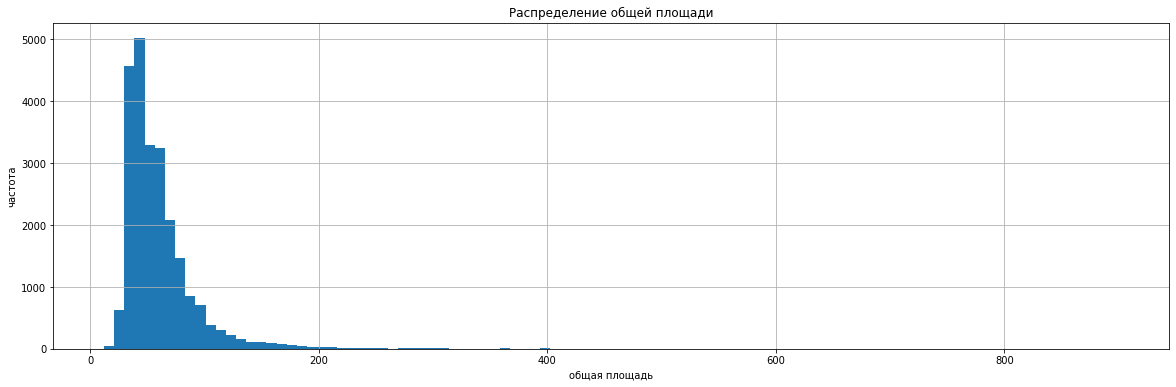

In [54]:
total_area_plot = data['total_area'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение общей площади',grid = True);
total_area_plot.set_xlabel('общая площадь');
total_area_plot.set_ylabel('частота');

In [55]:
data['total_area'].value_counts().sort_values()

55.06       1
57.86       1
43.75       1
111.40      1
127.21      1
         ... 
44.00     345
31.00     346
60.00     347
42.00     383
45.00     419
Name: total_area, Length: 2182, dtype: int64

С учетом того, что выбросы будут отсекаться по нескольким парметрам, в рамках одного параметра должно быть удалено не более 1% от массива  изначальных данных.

In [56]:
value_check = len(data)

In [57]:
value_check

23699

In [58]:
((data[(data['total_area'] > 200) | (data['total_area'] < 20)]['total_area'].count()/23699)*100).round(2)

1.07

Если мы удалим все квартиры с площадью  менее 20 и более 200 метров квадратных, то потеряем около 1% данных.

In [59]:
data = data[(data['total_area'] <= 200) & (data['total_area'] >= 20)]

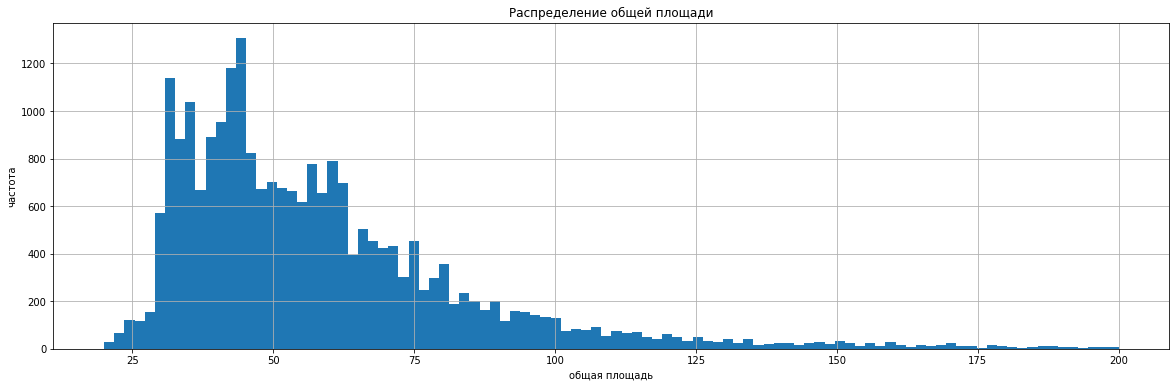

In [60]:
total_area_plot = data['total_area'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение общей площади',grid = True);
total_area_plot.set_xlabel('общая площадь');
total_area_plot.set_ylabel('частота');

Данные и их распределение выглядят правдоподбно.

**ЖИЛАЯ ПЛОЩАДЬ**

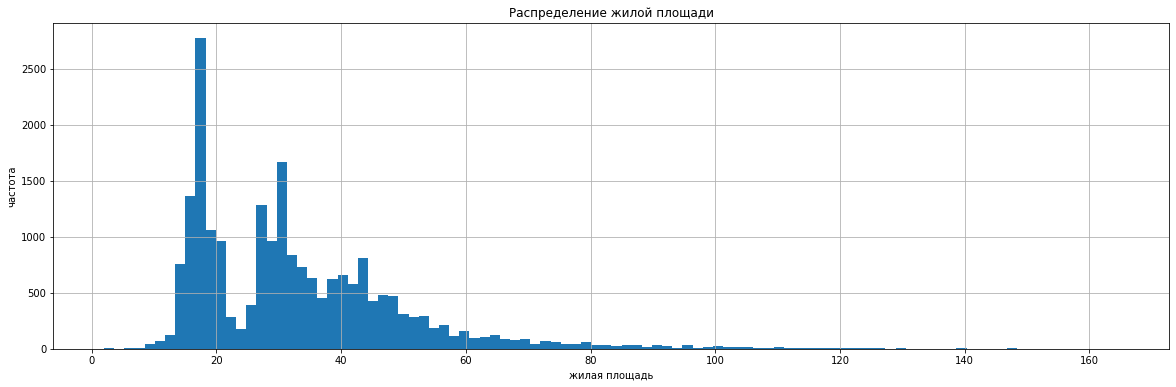

In [61]:
living_area_plot = data['living_area'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение жилой площади',grid = True);
living_area_plot.set_xlabel('жилая площадь');
living_area_plot.set_ylabel('частота');

Присутствует провал значений в районе 20-25 м(2).

In [62]:
data['living_area'].describe()

count    21579.000000
mean        33.270206
std         17.363980
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

Количество квартир с жилой площадью менее 10 метров крайне мало, как и количество квартир с жилой площадью более 100 метров.

In [63]:

data.query('living_area > 100 and living_area >= total_area') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,sale_weekday,sale_month,sale_year,floor_type,km_to_center


In [64]:

((data[(data['living_area'] > 100) | (data['living_area'] < 10)]['living_area'].count()/value_check)*100).round(2)

0.83

Теряется менее 1% объявлений от количества объявлений с известной жилой площадью.

In [65]:
data = data[(data['living_area'] <= 100) & (data['living_area'] >= 10) | (data['living_area'].isna())]

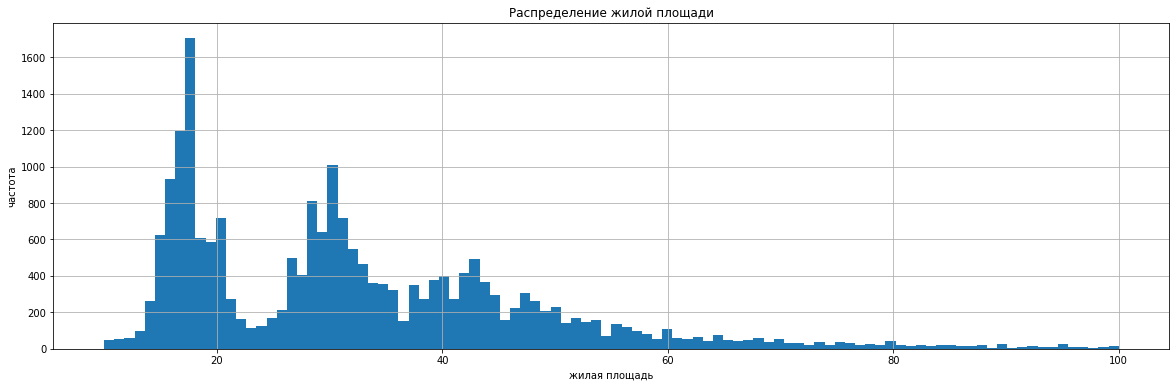

In [66]:
living_area_plot = data['living_area'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение жилой площади',grid = True);
living_area_plot.set_xlabel('жилая площадь');
living_area_plot.set_ylabel('частота');

**ПЛОЩАДЬ КУХНИ**

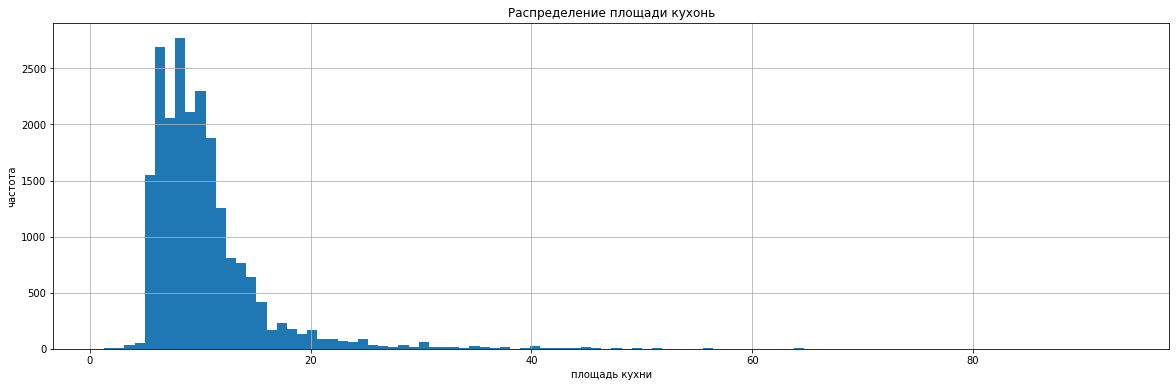

In [67]:
kitchen_area_plot = data['kitchen_area'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение площади кухонь',grid = True);
kitchen_area_plot.set_xlabel('площадь кухни');
kitchen_area_plot.set_ylabel('частота');

In [68]:
# Проверим данные на достоверность. Площадь кухни не может быть больше общей площади квартиры.
data.query('kitchen_area >= total_area') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,sale_weekday,sale_month,sale_year,floor_type,km_to_center


Недостоверные данные не обнаружены.

In [69]:
# Проверим долю выбросов (менее 5 и более 30 квадратных метров) от массива данных.
((data[(data['kitchen_area'] > 30) | (data['kitchen_area'] < 4)]['kitchen_area'].count()/value_check)*100).round(2)

1.14

In [70]:
# Удалим выбросы, т.е кухни с площадью менее 5 и более 30 метров квадратных.
data = data[(data['kitchen_area'] <= 30) & (data['kitchen_area'] >= 4) | (data['kitchen_area'].isna())]

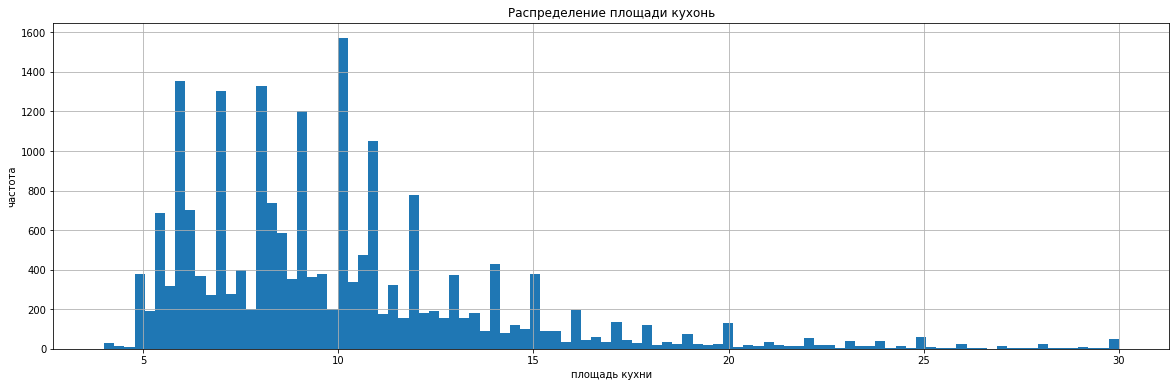

In [71]:
kitchen_area_plot = data['kitchen_area'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение площади кухонь',grid = True);
kitchen_area_plot.set_xlabel('площадь кухни');
kitchen_area_plot.set_ylabel('частота');

В целом данные и их распределение выглядят достаточно правдоподобно. Хотя также бросается в глаза нестабильность гистограммы. Это может быть связано с тем, что гистограмма предполагает диапазон корзины равной 0,5 квадратных метра. А площадь помещение зачастую равна целому числу, отсюда и провалы в корзинах, соответствующих нецелым значениям.

**СТОИМОСТЬ ОБЪЕКТА**

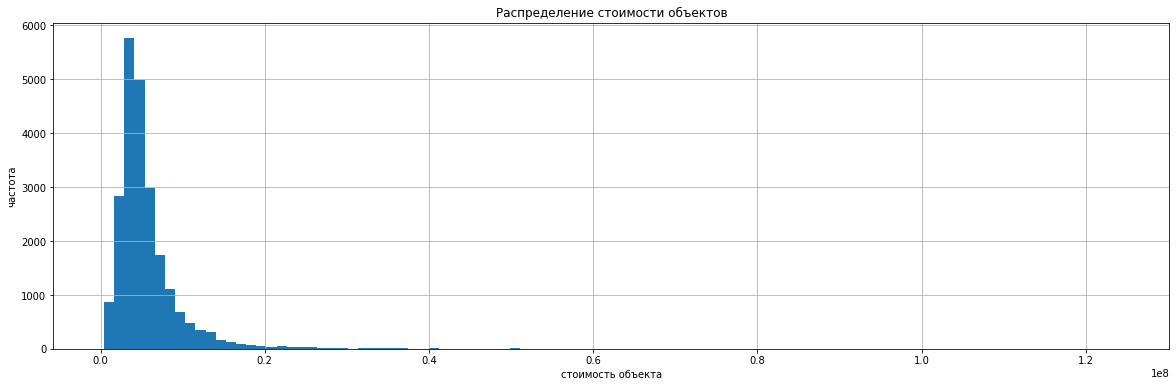

In [72]:
last_price_plot = data['last_price'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение стоимости объектов',grid = True);
last_price_plot.set_xlabel('стоимость объекта');
last_price_plot.set_ylabel('частота');

Мы видим, что размерность гистограммы указана в сотнях миллионов, при этом дальше 40 000 000 на графике не видно столбцов. Неясно, имеем ли мы дело с уникальными элитными квартирами или с ошибками в записи цены.

In [73]:
(data[data['last_price'] > 25000000]['price_per_meter'].mean()/10).round(2)

30259.49

In [74]:
data[data['last_price'] <= 25000000]['price_per_meter'].mean().round(2)

95311.03

Самой ожидаемой ошибкой в написании чисел миллионных порядков - это написание лишнего нуля. Однако мы видим, что если разделить среднеюю цену за квадратный метр сверхдорогого жилья на 10, то новая цена за квадратный метр более чем в 3 раза меньше средней цены жилья дешевле 25 000 000 рублей. Следовательно, дело не в ошибке. Попробуем сравнить наиболее влияющие на стоимость квартиры характеристики для квартир дороже 25 000 000 рублей и дешевле этой суммы.

In [75]:
data[data['last_price'] > 25000000].pivot_table(index='locality_name',values=['total_area','living_area','rooms','cityCenters_nearest'],aggfunc='median')

,cityCenters_nearest,living_area,rooms,total_area
locality_name,,,,
Пушкин,26141.5,69.750,4,136.15
Санкт-Петербург,5929.5,72.895,3,130.00
поселок Репино,42583.0,92.000,3,160.00


Группировка дорогих квартир по насленному пункту показала, что все они расположены в Санкт-Петербурге, Пушкине или в поселке Репино. Следовательно следует рассматривать только те относительно дешевые квартиры, которые расположены в этих населенных пунктах.

In [76]:
data[(data['last_price'] <= 25000000) \
     & ((data['locality_name'] == 'Санкт-Петербург')\
         | (data['locality_name'] == 'Пушкин')\
         | (data['locality_name'] == 'поселок Репино'))]\
.pivot_table(index='locality_name',values=['total_area','living_area','rooms','cityCenters_nearest'],aggfunc='median')

,cityCenters_nearest,living_area,rooms,total_area
locality_name,,,,
Пушкин,27941.0,30.0,2,53.0
Санкт-Петербург,12446.0,31.0,2,53.3
поселок Репино,43210.0,41.6,3,56.0


Видим, что всем основным характеристикам дорогие квартиры превосходят остальные. Скорее всего, их цена оправдана и не является следствием какой-либо ошибки. Удалим объявления с выбросом в цене продажи.

In [77]:
((data[data['last_price'] > 25000000].count()['last_price']/value_check)*100).round(2)

0.85

Если отбросить все квартиры дороже 25 000 000 рублей, то мы потеряем менее 1% от исходного массива данных. 

In [78]:
data = data[data['last_price'] < 25000000]

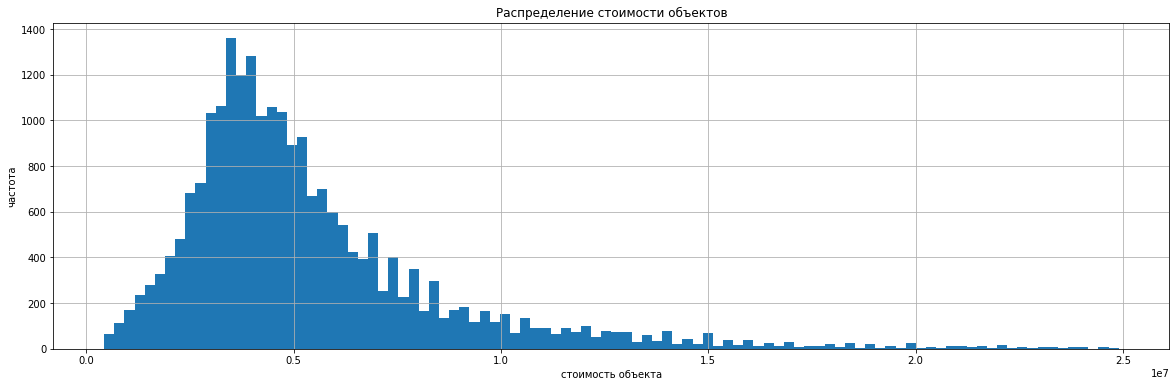

In [79]:
last_price_plot = data['last_price'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение стоимости объектов',grid = True);
last_price_plot.set_xlabel('стоимость объекта');
last_price_plot.set_ylabel('частота');

**КОЛИЧЕСТВО КОМНАТ**

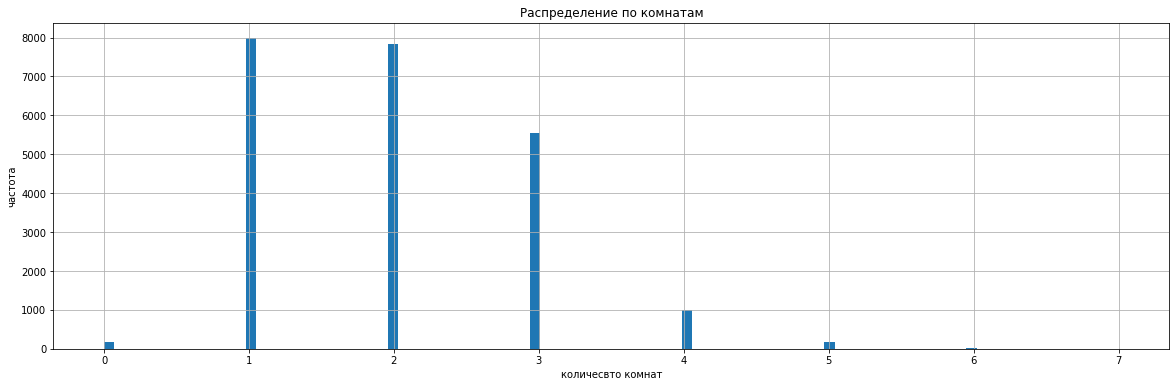

In [80]:
rooms_plot = data['rooms'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение по комнатам',grid = True);
rooms_plot.set_xlabel('количесвто комнат');
rooms_plot.set_ylabel('частота');

In [81]:
# Так как количество значений невелико также для наглядности применим метод value_counts
data['rooms'].value_counts()

1    7985
2    7823
3    5559
4     991
5     187
0     186
6      24
7       6
Name: rooms, dtype: int64

Значения выглядят правдоподбно, однако, обращает внимание на себя некоторое количество квартир с нулем комнат. Может быть это квартиры-студии и квартиры со свободной планировкой?

In [82]:
data.query('rooms == 0')['rooms'].count()

186

Всего квартир 186, у которых 0 комнат.

In [83]:
data.query('rooms == 0 and (studio == True or open_plan == True)')['rooms'].count()

186

Гипотеза подтвердилась, квартиры, у которых 0 комнат - это студии или квартиры со свободной планировкой. Удалим квартиры с 6 и 7 комнатами, так как эти категории слишком малочислены.

В итоге, к выбросам можно отнести квартиры с 0, 5, 6 и 7 комнатами. Однако, как мы выяснили, 0 комнат - это квартиры со свободной планировкой и студии. Удалив вроде бы незначительное количество объявлений, мы потеряем сразу две категории квартир. Поэтому удалим только квартиры с 5,6 и 7 комнатами.

In [84]:
data = data[data['rooms'] <= 4]

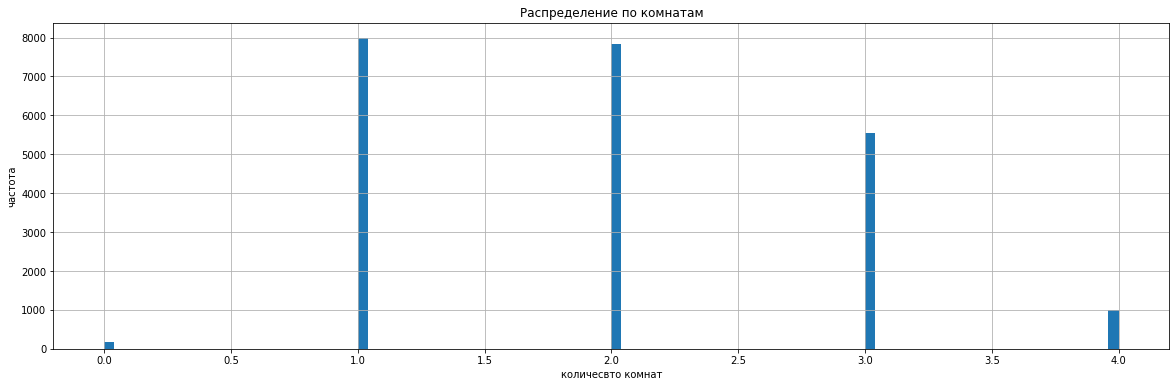

In [85]:
rooms_plot = data['rooms'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение по комнатам',grid = True);
rooms_plot.set_xlabel('количесвто комнат');
rooms_plot.set_ylabel('частота');

**ВЫСОТА ПОТОЛКОВ**

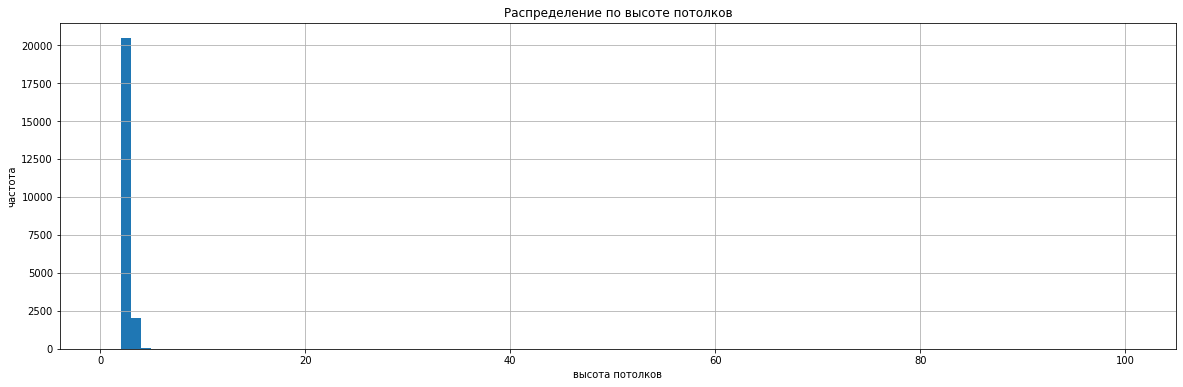

In [86]:
ceiling_height_plot = data['ceiling_height'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение по высоте потолков',grid = True);
ceiling_height_plot.set_xlabel('высота потолков');
ceiling_height_plot.set_ylabel('частота');

Очевидно, в данных присутствуют выбросы, так как практически все данные попали в одну корзину (от 0 до ~ 5м). Можно предположить, что при вводе данных ошиблись с запятой. Следовательно, нас интересуют потолки высотой выше 20 метров, так как это соответствует 2 метрам, если мы допускаем, чтобы была ошибка в точке разделителе.

In [87]:
data.query('ceiling_height > 20')['ceiling_height']

355       25.0
3148      32.0
4643      25.0
4876      27.0
5076      24.0
5246      27.0
5669      26.0
5807      27.0
6246      25.0
9379      25.0
10773     27.0
11285     25.0
14382     25.0
17857     27.0
18545     25.0
20478     27.0
20507     22.6
21377     27.5
21824     27.0
22336     32.0
22869    100.0
22938     27.0
Name: ceiling_height, dtype: float64

Данные действительно говорят в пользу нашей теории об ошибке в разделителе. Хотя 100 метров даже тут выглядят неожиданно. Приведем эти значения к ожидаемым величинам.

In [88]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 20, (data['ceiling_height']/10))

Теперь, когда значения приведены в норму, посмотрим на обновленную гистограмму.

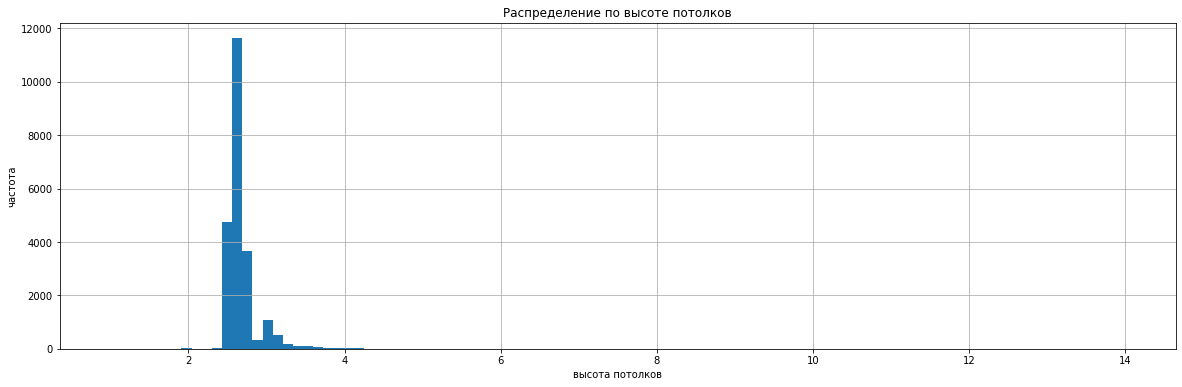

In [89]:
ceiling_height_plot = data['ceiling_height'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение по высоте потолков',grid = True);
ceiling_height_plot.set_xlabel('высота потолков');
ceiling_height_plot.set_ylabel('частота');

In [90]:
data['ceiling_height'].describe().round(2)

count    22544.00
mean         2.68
std          0.23
min          1.00
25%          2.60
50%          2.65
75%          2.70
max         14.00
Name: ceiling_height, dtype: float64

Вновь практически все квартиры оказались в одной корзине. Также теперь мы видим, что есть квартиры с очень низкими потолками, это тоже очень странные значения, так как даже в хрущевках высота потолков не бывает ниже 2,4 метров. Удалим значения, являющиеся выбросами, не боясь потерять те объявления, где высота потолков была указана с ошибкой.

In [91]:
((data[(data['ceiling_height'] > 3.5) | (data['ceiling_height'] < 2.5)]['ceiling_height'].count()/value_check)*100).round(2)

1.1

In [92]:
data = data[(data['ceiling_height'] <= 3.5) & (data['ceiling_height'] >= 2.5) | (data['ceiling_height'].isna() == True)]

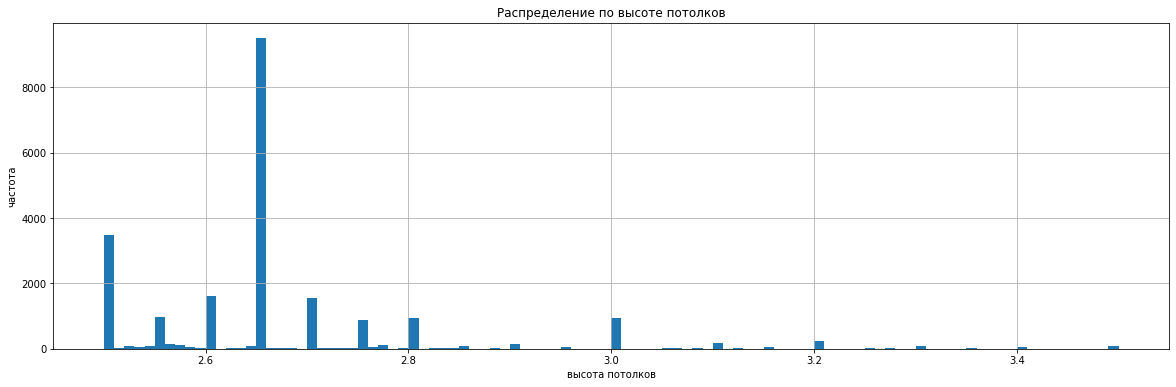

In [93]:
ceiling_height_plot = data['ceiling_height'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение по высоте потолков',grid = True);
ceiling_height_plot.set_xlabel('высота потолков');
ceiling_height_plot.set_ylabel('частота');

Ожидаемо, что высота большинства потолков в диапазоне от 2,5 до 3,5 метров.

**ТИП ЭТАЖА КВАРТИРЫ**

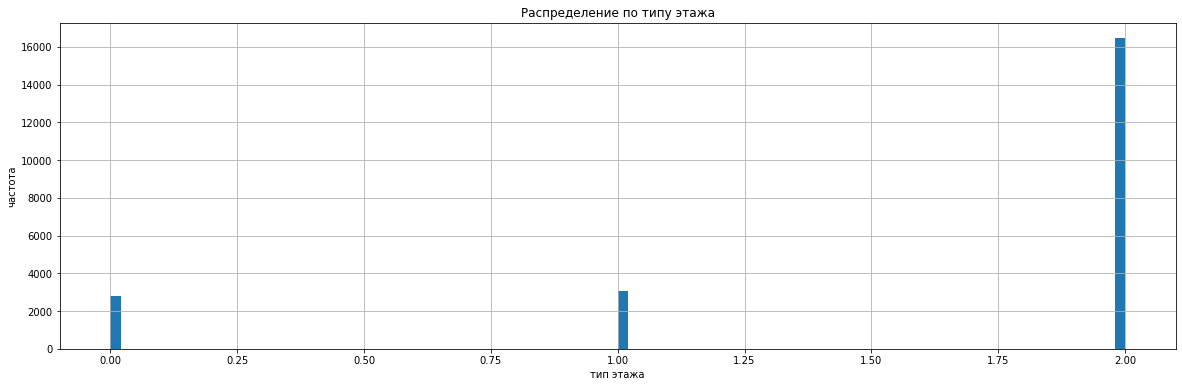

In [94]:
floor_type_plot = data['floor_type'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение по типу этажа',grid = True);
floor_type_plot.set_xlabel('тип этажа');
floor_type_plot.set_ylabel('частота');

In [95]:
data['floor_type'].value_counts()

2    16455
1     3058
0     2771
Name: floor_type, dtype: int64

Распределение квартир по отношению к этажу выглядит правдоподобным. Продолжим рассмотрение других данных.

**ЭТАЖНОСТЬ ДОМОВ**

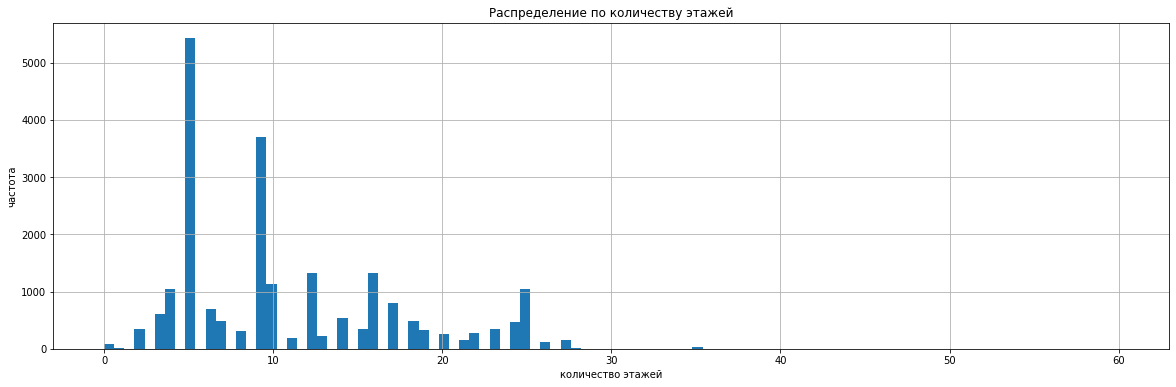

In [96]:
floor_total_plot = data['floors_total'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение по количеству этажей',grid = True);
floor_total_plot.set_xlabel('количество этажей');
floor_total_plot.set_ylabel('частота');

Распределение домов по их высотности выглядит правдоподобно: огромное количество пятиэтажных и девятиэтажных домов, некоторое количество одно- двухэтажных домов (вероятно в послеках и деревнях), а также многоэтажные новостройки. Удалим выбросы больше 30 этажей.

In [97]:
data = data[data['floors_total'] <= 30]

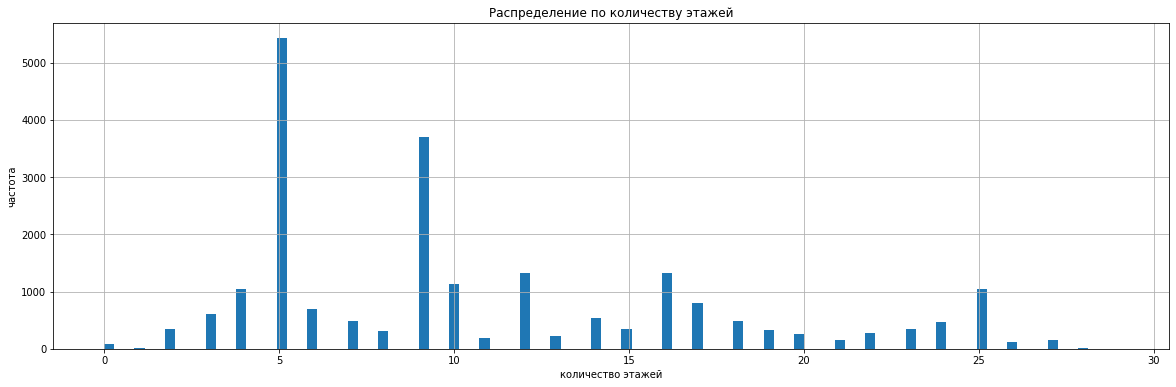

In [98]:
floor_total_plot = data['floors_total'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение по количеству этажей',grid = True);
floor_total_plot.set_xlabel('количество этажей');
floor_total_plot.set_ylabel('частота');

**РАССТОЯНИЕ ДО ЦЕНТРА ГОРОДА**

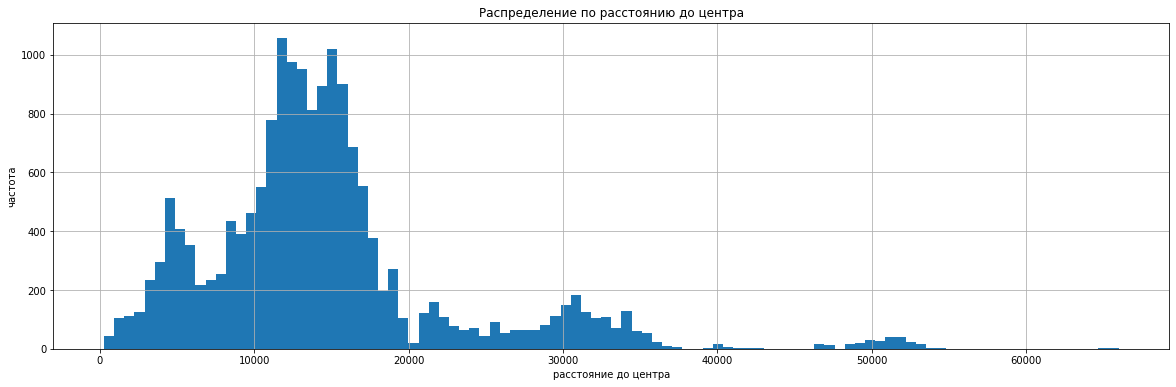

In [99]:
center_plot = data['cityCenters_nearest'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение по расстоянию до центра',grid = True);
center_plot.set_xlabel('расстояние до центра');
center_plot.set_ylabel('частота');

Оценить правдоподобность данных по расстоянию от центра города тяжело, так как для этого необходимо иметь представление о структуре Санкт-Петербурга и его окрестностей. Так например, провал в районе 7-8 километров от центра может быть обусловлен Обводным каналом, промзонами или иными факторами. Удаление выбросов приведет к тому, что из анализа выпадут отдельные населенные пункты, так как дома расположенные на одном расстоянии от центра вероятнее всего расположены в одном и том же населенном пункте. Поэтому оставим данные без изменений.

**РАССТОЯНИЕ ДО БЛИЖАЙШЕГО ПАРКА**

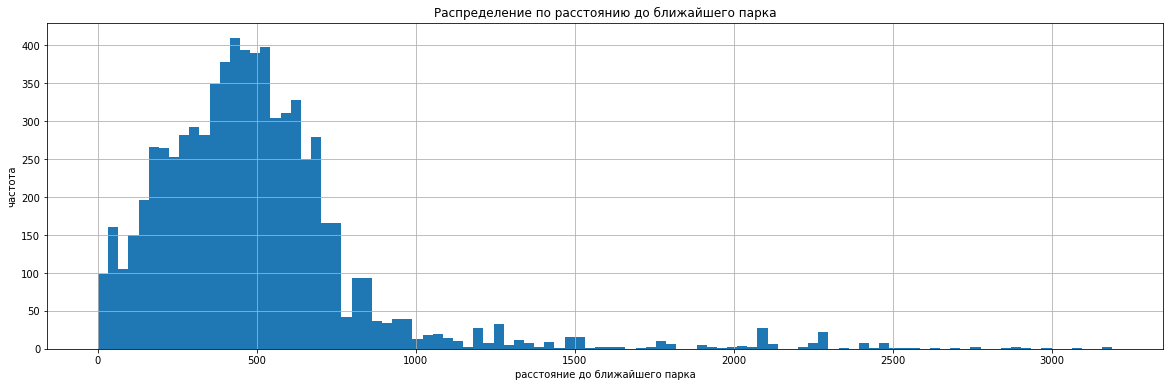

In [100]:
park_plot = data['parks_nearest'].plot(kind='hist', bins=100, figsize=(20,6), title='Распределение по расстоянию до ближайшего парка',grid = True);
park_plot.set_xlabel('расстояние до ближайшего парка');
park_plot.set_ylabel('частота');

In [101]:
((data[data['parks_nearest'] > 2500]['parks_nearest'].count()/value_check)*100).round(2)

0.06

In [102]:
data = data[(data['parks_nearest'] <= 2500) | (data['parks_nearest'].isna() == True)]

In [103]:
100 - len(data)/value_check*100

6.160597493565135

**5.2. ОЦЕНКА СКОРОСТИ ПРОДАЖИ КВАРТИР**

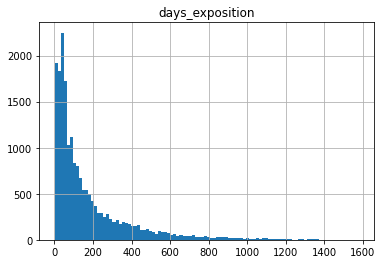

In [115]:
data.hist('days_exposition',bins=100);

In [116]:
data['days_exposition'].mean()

176.1110824742268

In [117]:
data['days_exposition'].median()

93.0

Медианное время продажи практически в 2 раза меньше среднего времени продажи. Это говорит о том, что немногочисленные, но очень большие по величине выбросы значительно искажают данные.

In [118]:
data['days_exposition'].describe()

count    19400.000000
mean       176.111082
std        214.617058
min          1.000000
25%         44.000000
50%         93.000000
75%        224.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [119]:
44-(225-44)*1.5

-227.5

In [120]:
225+(225-44)*1.5

496.5

Так как медианное значение тяготеет к первому квартилю, а разность первого квартиля и 1,5 межквартильного интервала меньше нуля, то можем считать быстрыми те продажи, которые попали в превый квартиль, то есть 44 дня и быстрее. Необычно долгими будем считать продажи, превышающие сумму третьего межквартильного интервала и 1,5 межквартильного интервала, то есть более 497 дней.

In [121]:
data.pivot_table(index='sale_year',values='days_exposition')

,days_exposition
sale_year,
2014,918.390000
2015,640.890873
2016,316.487411
2017,156.061646
2018,93.385866
2019,30.871720


Видим, что с каждым годом скорость продажи квартиры растет. Вероятно это связано с тем, что с течением всё больше людей узнавали и начинали доверять интернет-площадкам по продаже квартир, а также усовершенствованию механизмов подбора квартир по параметрам.

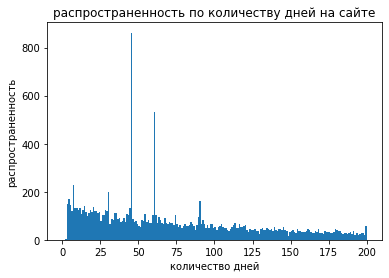

In [122]:
days_exposition_plot = data['days_exposition'].plot(kind='hist',bins=200, range=(0,200), title='распространенность по количеству дней на сайте');
days_exposition_plot.set_xlabel('количество дней');
days_exposition_plot.set_ylabel('распространенность');

Мы видим два наиболее ярких всплеска значений примерно после 40-го дня. Узнаем, на какие конкретно дни они приходятся.

In [123]:
data.query('days_exposition >=40')['days_exposition'].value_counts(ascending=False)

45.0      862
60.0      531
90.0      162
44.0      133
42.0      109
         ... 
1396.0      1
755.0       1
831.0       1
923.0       1
1174.0      1
Name: days_exposition, Length: 1074, dtype: int64

45, 60 день. Такие же временные ограничения на бесплатное размещение на сайте объявления для квартир стоимостью до 4 500 000 руб. и 10 000 000 руб. соответственно.

In [124]:
data.query('days_exposition == 45  and last_price < 4500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,sale_weekday,sale_month,sale_year,floor_type,km_to_center


С данными что-то не так, переведем их в формат int.

In [126]:
data['days_exposition'] = data[data['days_exposition'].isna() == False]['days_exposition'].astype(int)

In [127]:
bad_data_45 = data.query('days_exposition == 45 and last_price < 4500000')
bad_data_45

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,sale_weekday,sale_month,sale_year,floor_type,km_to_center
78,9,4350000,37.0,2018-02-22,1,2.65,19,18.0,6,NaN,...,NaN,0.0,NaN,45.0,117567.57,3,2,2018,2,14.0
89,9,2500000,63.0,2018-10-25,3,2.50,5,43.0,4,NaN,...,NaN,NaN,NaN,45.0,39682.54,3,10,2018,2,NaN
110,6,3850000,72.3,2017-09-29,2,2.65,3,27.4,2,NaN,...,NaN,NaN,NaN,45.0,53250.35,4,9,2017,2,NaN
153,12,4350000,55.0,2017-05-21,2,2.57,9,31.2,2,NaN,...,589.0,0.0,NaN,45.0,79090.91,6,5,2017,2,34.0
158,15,3100000,47.3,2017-11-07,2,2.65,5,27.5,2,NaN,...,NaN,NaN,NaN,45.0,65539.11,1,11,2017,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,10,2900000,43.4,2018-01-11,2,2.65,5,NaN,1,NaN,...,202.0,2.0,397.0,45.0,66820.28,3,1,2018,0,14.0
23613,4,3950000,52.0,2018-03-04,3,2.65,5,NaN,2,NaN,...,NaN,0.0,NaN,45.0,75961.54,6,3,2018,2,21.0
23670,9,2450000,45.6,2018-02-08,1,2.80,9,NaN,2,NaN,...,NaN,NaN,NaN,45.0,53728.07,3,2,2018,2,NaN
23679,0,2500000,35.0,2017-12-08,1,2.65,9,NaN,4,NaN,...,NaN,NaN,NaN,45.0,71428.57,4,12,2017,2,NaN


Мы получили выборку из квартир, стоимость которых была ниже 4 500 000 рублей и которые были сняты с продажи, так как закончился срок бесплатного размещения на сайте равный 45 дням.

In [128]:
bad_data_60 = data.query('days_exposition == 60  and 4500000 <= last_price <= 10000000')
bad_data_60

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,sale_weekday,sale_month,sale_year,floor_type,km_to_center
22,20,5000000,58.0,2017-04-24,2,2.75,25,30.0,15,NaN,...,NaN,NaN,NaN,60.0,86206.90,0,4,2017,2,NaN
82,3,4500000,80.5,2018-01-15,3,2.65,25,NaN,16,NaN,...,NaN,0.0,NaN,60.0,55900.62,0,1,2018,2,18.0
105,12,4900000,32.0,2018-01-07,1,2.65,25,15.0,5,NaN,...,NaN,1.0,464.0,60.0,153125.00,6,1,2018,2,16.0
118,8,4500000,31.0,2019-02-24,1,2.50,9,17.0,4,NaN,...,NaN,2.0,439.0,60.0,145161.29,6,2,2019,2,9.0
352,3,5496074,48.6,2016-04-25,1,2.65,11,13.0,3,False,...,NaN,1.0,433.0,60.0,113087.94,0,4,2016,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23576,6,7000000,91.0,2017-05-12,3,2.65,9,53.0,4,False,...,NaN,0.0,NaN,60.0,76923.08,4,5,2017,2,13.0
23600,8,8700000,132.0,2018-11-13,3,2.65,9,78.0,3,NaN,...,NaN,0.0,NaN,60.0,65909.09,1,11,2018,2,18.0
23621,11,5000000,37.9,2017-08-31,1,2.60,21,18.9,14,NaN,...,NaN,0.0,NaN,60.0,131926.12,3,8,2017,2,14.0
23635,9,5100000,36.0,2018-10-26,1,2.80,15,18.0,11,NaN,...,NaN,1.0,405.0,60.0,141666.67,4,10,2018,2,12.0


Мы получили выборку из квартир, стоимость которых была от 4 500 000 до 10 000 000 рублей и которые были сняты с продажи, так как закончился срок бесплатного размещения на сайте равный 60 дням.

Посчитаем скорость продажи квартир без этих значений.

In [129]:
good_data = data.query('days_exposition.index not in @bad_data_45.index and days_exposition.index not in @bad_data_60.index')

In [130]:
good_data['days_exposition'].describe()

count    18100.000000
mean       185.125967
std        219.436228
min          1.000000
25%         41.000000
50%        104.000000
75%        240.000000
max       1580.000000
Name: days_exposition, dtype: float64

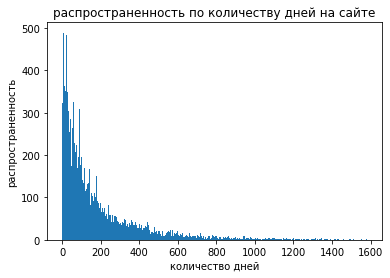

In [131]:
days_exposition_plot = good_data['days_exposition'].plot(kind='hist',bins=500, title='распространенность по количеству дней на сайте');
days_exposition_plot.set_xlabel('количество дней');
days_exposition_plot.set_ylabel('распространенность');

Новая выборка имеет другие квантили, поэтому посмотрим на них в графическом виде:

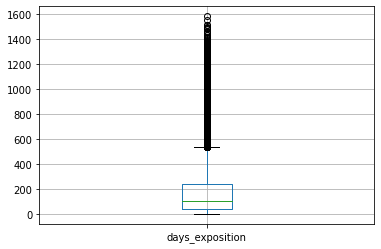

In [132]:
good_data.boxplot('days_exposition');

Основываясь на новых данных, можно сказать, что продажи после 538 дня можно считать неожиданно длительными, а продажи, которые совершились меньше чем через 41 день после публикации объявления - быстрыми.

**5.3 ВЛИЯНИЕ РАЗЛИЧНЫХ ФАКТОРОВ НА СТОИМОСТЬ КВАРТИРЫ**

**ЗАВИСИМОСТЬ СТОИМОСТИ КВАРТИРЫ ОТ ОБЩЕЙ ПЛОЩАДИ**

In [133]:
data['last_price'].corr(data['total_area']).round(2)

0.76

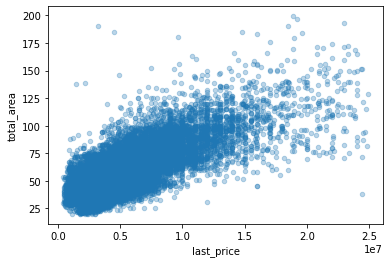

In [134]:
data.plot(x='last_price',y='total_area',kind='scatter', alpha=0.3);

Определенно наблюдается зависимость между стоимостью квартиры и ее площадью, чем она больше площадь, тем выше стоимость квартиры.

**ЗАВИСИМОСТЬ СТОИМОСТИ КВАРТИРЫ ОТ ЖИЛОЙ ПЛОЩАДИ**

In [135]:
data['last_price'].corr(data['living_area']).round(2)

0.64

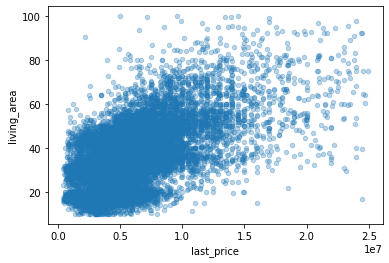

In [136]:
data.plot(x='last_price',y='living_area',kind='scatter', alpha=0.3);

Наблюдается зависимость между жилой площадью и стоимостью квартиры, чем больше площадь, тем выше стоимость. Однако, она не столь явная, как зависимость между общей площадью и стоимостью.

**ЗАВИСИМОСТЬ СТОИМОСТИ КВАРТИРЫ ОТ ПЛОЩАДИ КУХНИ**

In [137]:
data['last_price'].corr(data['kitchen_area']).round(2)

0.56

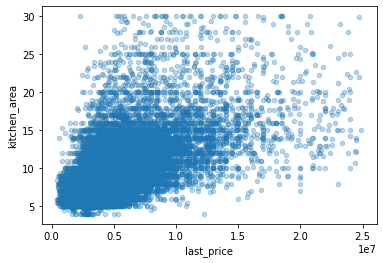

In [138]:
data.plot(x='last_price',y='kitchen_area',kind='scatter', alpha=0.3);

Наблюдается зависимость между площадью кухни и стоимостью квартиры, чем больше площадь, тем выше стоимость. Однако, она не столь явная, как зависимость между общей площадью и стоимостью.

**ЗАВИСИСМОСТЬ СТОИМОСТИ КВАРТИРЫ ОТ КОЛИЧЕСТВА КОМНАТ**

In [139]:
data.pivot_table(index='rooms',values='last_price', aggfunc=['mean','median']).round(0)

,mean,median
,last_price,last_price
rooms,,
0,3014185.0,2750000
1,3794480.0,3600000
2,5313143.0,4700000
3,6985318.0,6000000
4,9014430.0,7950000


In [140]:
data['last_price'].corr(data['rooms'])

0.45424680602318346

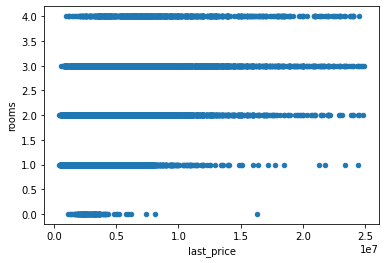

In [141]:
data.plot(x='last_price',y='rooms',kind='scatter');

График показывает неожиданные результаты: есть крайне дешевые четырех- и пятикмонатные квартиры. Возможно, это могут быть мошеннические объявления.

In [142]:
data['last_price'].corr(data['floor_type']).round(2)

0.14

In [143]:
data.pivot_table(index='floor_type',values='last_price', aggfunc=['mean','median']).round(0)

,mean,median
,last_price,last_price
floor_type,,
0,4291442.0,3850000
1,4956801.0,4150000
2,5566571.0,4700000


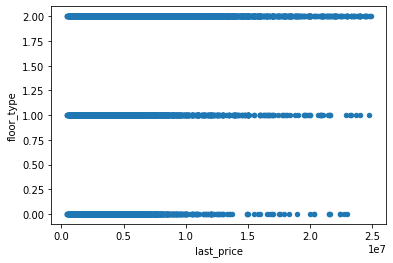

In [144]:
data.plot(x='last_price',y='floor_type',kind='scatter');

Мы видим, что этаж влияет на стоимость квартиры. На первом этаже квартиры в основном дешевле, чем на последнем или на другом.

**ЗАВИСИМОСТЬ ОБЩЕЙ ЦЕНЫ ОТ ДНЯ НЕДЕЛИ ПРОДАЖИ**

In [145]:
data.pivot_table(index='sale_weekday',values='last_price', aggfunc=['mean','median']).round(0)

,mean,median
,last_price,last_price
sale_weekday,,
0,5307877.0,4500000
1,5387568.0,4600000
2,5382722.0,4550000
3,5367214.0,4500000
4,5274739.0,4482900
5,5179480.0,4490000
6,5237621.0,4499500


In [146]:
data['last_price'].corr(data['sale_weekday']).round(2)

-0.01

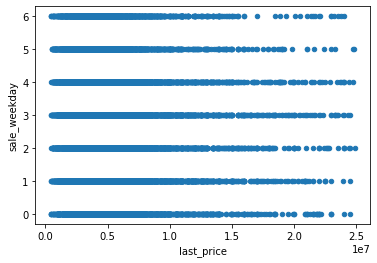

In [147]:
data.plot(x='last_price',y='sale_weekday',kind='scatter');

Зависимость не наблюдается. День недели продажи практически не влияет на стоимость квартиры.

**ЗАВИСИМОСТЬ ОБЩЕЙ ЦЕНЫ ОТ ДНЯ МЕСЯЦА ПРОДАЖИ**

In [148]:
data.pivot_table(index='sale_month',values='last_price', aggfunc=['mean','median']).round(0)

,mean,median
,last_price,last_price
sale_month,,
1,5337141.0,4500000
2,5308074.0,4500000
3,5292487.0,4500000
4,5402831.0,4680000
5,5279084.0,4430000
6,5098774.0,4300000
7,5248893.0,4494500
8,5348828.0,4500000


In [149]:
data['last_price'].corr(data['sale_month']).round(2)

0.01

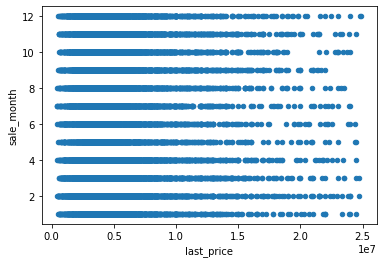

In [150]:
data.plot(x='last_price',y='sale_month',kind='scatter');

Можно заметить, что в сентябре и октябре продаж дорогих квартир несколько меньше, чем в остальные месяцы.

**ЗАВИСИМОСТЬ ОБЩЕЙ ЦЕНЫ ОТ ГОДА ПРОДАЖИ**

In [151]:
price_per_year = data.pivot_table(index='sale_year',values='last_price').round(0)
price_per_year 

,last_price
sale_year,
2014,8104011.0
2015,5862940.0
2016,5339256.0
2017,5213512.0
2018,5211284.0
2019,5633823.0


In [152]:
area_per_year = data.pivot_table(index='sale_year',values='total_area').round(1)
area_per_year

,total_area
sale_year,
2014,73.7
2015,60.8
2016,56.5
2017,55.2
2018,54.2
2019,54.4


In [153]:
sales_per_year = data.pivot_table(index='sale_year',values='total_area',aggfunc='count').round(0)
sales_per_year

,total_area
sale_year,
2014,112
2015,1059
2016,2599
2017,7673
2018,8095
2019,2701


In [155]:
result = merge_1.merge(area_per_year, on='sale_year').rename(columns ={'total_area_x':'count','total_area_y':'total_area'})
result

,last_price,count,total_area
sale_year,,,
2014,8104011.0,112,73.7
2015,5862940.0,1059,60.8
2016,5339256.0,2599,56.5
2017,5213512.0,7673,55.2
2018,5211284.0,8095,54.2
2019,5633823.0,2701,54.4


Мы видим, что после 2014 года средняя стоимость квартиры резко упала, а потом держалась примерно на одном уровне, при том, что также упала и средняя площадь квартиры. Значит, вырос спрос на более компактные, а следовательно более дешевые квартиры. Также, начиная с 2014 года ежегодно росло количество объявлений, но в 2019 году произошел резкий спад. Может быть в игру вступил мощный конкурент или было принято какое-либо бизнес-решение, оттолкнувшее пользователей?

In [156]:
data['last_price'].corr(data['sale_year']).round(2)

-0.02

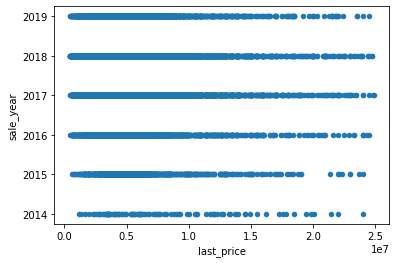

In [157]:
data.plot(x='last_price',y='sale_year',kind='scatter');

Можно наблюдать, что в 2014 году продаж был значительно меньше, чем в остальные года. Потом в течение 2015-2016 годов продажи росли и достгли своего максимума в 2017 и 2018 годах. В 2019 году продажи дорогого жилья начали уменьшаться.

**5.4 ЦЕНА КВАДРАТНОГО МЕТРА ЖИЛЬЯ ДЛЯ САМЫХ ПОПУЛЯРНЫХ НАСЕЛЕННЫХ ПУНКТОВ**

In [158]:
# Определим топ-10 населенных пунктов с самым дорогим квадратным метром жилья.
data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['mean','count'])\
.round(0)\
.rename(columns ={'mean':'mean_price_per_meter','count':'amount_of_flats','price_per_meter':''})\
.sort_values('amount_of_flats', ascending=False)\
.head(10)

,mean_price_per_meter,amount_of_flats
,,
locality_name,,
Санкт-Петербург,109186.0,14421
поселок Мурино,85660.0,550
Кудрово,95383.0,469
поселок Шушары,78617.0,433
Всеволожск,68576.0,394
Пушкин,101942.0,345
Колпино,75440.0,334
поселок Парголово,90362.0,325


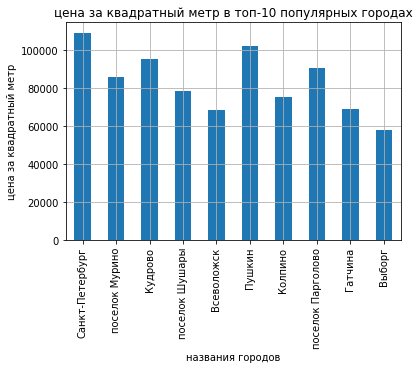

In [159]:
# Определим топ-10 населенных пунктов с самым дорогим квадратным метром жилья.
meter_price = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['mean','count'])\
.round(0)\
.reset_index()\
.rename(columns ={'mean':'mean_price_per_meter','count':'amount_of_flats','price_per_meter':''})\
.sort_values('amount_of_flats', ascending=False)\
.head(10)\
.plot(kind='bar',x='locality_name',y='mean_price_per_meter', grid=True, title='цена за квадратный метр в топ-10 популярных городах', legend=False)
meter_price.set_xlabel('названия городов');
meter_price.set_ylabel('цена за квадратный метр');

Из результатов, представленных в сводной таблице, видно, что наиболее дорогой квадратный метр жилья в Санкт-Петербурге и Пушкине, а наиболее дешевый в Выборге и Всеволожске.

**5.5. ОПРЕДЕЛЕНИЕ СРЕДНЕЙ ЦЕНЫ ЗА КВАДРАТНЫЙ МЕТР В САНКТ-ПЕТЕРБУРГЕ В ЗАВИСИМОСТИ ОТ УДАЛЕННОСТИ ОТ ЦЕНТРА ГОРОДА**

In [160]:
data.query('locality_name == "Санкт-Петербург"')\
.pivot_table(index='km_to_center', values='price_per_meter', aggfunc='mean')

,price_per_meter
km_to_center,
0.0,110557.905000
1.0,128581.489286
2.0,127127.266114
3.0,115762.261012
4.0,124342.233661
5.0,130615.218815
6.0,129672.617568
7.0,126968.184955
8.0,122108.114412


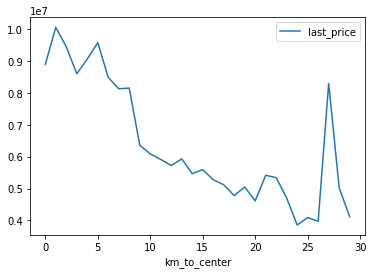

In [161]:
data.query('locality_name == "Санкт-Петербург"')\
.pivot_table(index='km_to_center', values='last_price', aggfunc='mean')\
.reset_index()\
.plot(x='km_to_center',y='last_price', kind='line');

На графике мы можем наблюдать тренд на снижение цены по мере увеличения расстояния до центра Санкт-Петербурга. Однако как график, так и сводная таблица указывают на резкий скачок цены на удаленности от центра равной 27 километрам. Стоит рассмотреть отдельно объявления, находящиеся в этой группе.

In [162]:
data_count = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='km_to_center',columns='floor_type', values='last_price', aggfunc='count').reset_index()
data_count['prop_first'] = data_count[0]/(data_count[0]+data_count[1]+data_count[2])
data_count['prop_last'] = data_count[1]/(data_count[0]+data_count[1]+data_count[2])
data_count['prop_another']= data_count[2]/(data_count[0]+data_count[1]+data_count[2])
data_count

floor_type,km_to_center,0,1,2,prop_first,prop_last,prop_another
0,0.0,2.0,2.0,4.0,0.250000,0.250000,0.500000
1,1.0,17.0,35.0,74.0,0.134921,0.277778,0.587302
2,2.0,35.0,54.0,104.0,0.181347,0.279793,0.538860
3,3.0,42.0,62.0,153.0,0.163424,0.241245,0.595331
4,4.0,65.0,80.0,374.0,0.125241,0.154143,0.720617
5,5.0,67.0,108.0,534.0,0.094499,0.152327,0.753173
6,6.0,56.0,63.0,358.0,0.117400,0.132075,0.750524
7,7.0,30.0,51.0,250.0,0.090634,0.154079,0.755287
8,8.0,49.0,61.0,434.0,0.090074,0.112132,0.797794
9,9.0,50.0,79.0,428.0,0.089767,0.141831,0.768402


На нулевом километре слишком мало квартир, чтобы рассматривать результаты. Далее мы видим, что со второго по четвертый километр доля квартир не на первом и не на последнем этаже не превышает 60%, затем на пятом километре их доля резко подскакивает до 72, что обуславливает скачок стоимости, а дальше при сохранении доли квартир не на первом и не на последнем этаже стоимость падает, так как квартиры всё дальше и дальше от центра города.

In [163]:
data.query('locality_name == "Санкт-Петербург" and km_to_center == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,sale_weekday,sale_month,sale_year,floor_type,km_to_center
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,NaN,...,1496.0,0.0,NaN,128.0,193918.92,1,11,2017,2,27.0
5961,6,2250000,32.0,2018-02-27,1,2.65,2,16.5,2,NaN,...,NaN,0.0,NaN,178.0,70312.50,1,2,2018,1,27.0


Как мы видим в Санкт-Петербурге на удалении в 27 километров от центра всего 2 объявления, отсюда и такая "резкость" графика в указанной области. 

### Общий вывод

Для исследования нами был использован массив данных, в котором находилось 23699 объявлений, со следующей информацией:

В представленном датафрейме 22 столбца:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м). Содержит 18 157 non-null значений в формате "число с плавающей точкой" (float64).
- `balcony` — число балконов. Содержит 12 1180 non-null значений в формате "число с плавающей точкой" (float64).
- `ceiling_height` — высота потолков (м). Содержит 14 504 non-null значений в формате "число с плавающей точкой" (float64).
- `cityCenters_nearest` — расстояние до центра города (м). Содержит 18 180 non-null значений в формате "число с плавающей точкой" (float64).
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия). Содержит 20 518 non-null значений в формате "число с плавающей точкой" (float64).
- `first_day_exposition` — дата публикации. Содержит 23 699 non-null значений в формате object.
- `floor` — этаж. Содержит 23 699 non-null значений в формате "целочисленное число" (int64).
- `floors_total` — всего этажей в доме. Содержит 23 613 non-null значений в формате "число с плавающей точкой" (float64).
- `is_apartment` — апартаменты (булев тип). Содержит 2 775 non-null значений.
- `kitchen_area` — площадь кухни в квадратных метрах (м²). Содержит 21 421 non-null значений в формате "число с плавающей точкой" (float64).
- `last_price` — цена на момент снятия с публикации. Содержит 23 699 non-null значений в формате "число с плавающей точкой" (float64).
- `living_area` — жилая площадь в квадратных метрах (м²). Содержит 21 796 non-null значений в формате "число с плавающей точкой" (float64).
- `locality_name` — название населённого пункта. Содержит 23 650 non-null значений в формате (object).
- `open_plan` — свободная планировка (булев тип). Содержит 23 699 non-null значений.
- `parks_around3000` — число парков в радиусе 3 км. Содержит 18 181 non-null значений в формате "число с плавающей точкой" (float64).
- `parks_nearest` — расстояние до ближайшего парка (м). Содержит 8 079 non-null значений в формате "число с плавающей точкой" (float64).
- `ponds_around3000` — число водоёмов в радиусе 3 км. Содержит 18 181 non-null значений в формате "число с плавающей точкой" (float64).
- `ponds_nearest` — расстояние до ближайшего водоёма (м). Содержит 9 110 non-null значений в формате "число с плавающей точкой" (float64).
- `rooms` — число комнат. Содержит 23 699 non-null значений в формате "целочисленное число" (int64).
- `studio` — квартира-студия (булев тип). Содержит 23 699 non-null значений.
- `total_area` — общая площадь квартиры в квадратных метрах (м²). Содержит 23 699 non-null значений в формате "число с плавающей точкой" (float64).
- `total_images` — число фотографий квартиры в объявлении. Содержит 23 699 non-null значений в формате  "целочисленное число" (int64).

На этапе предобработки данных были обработаны пропуски в столбцах:

- `is_apartment`
- `balcony`
- `ceiling_height`
- `locality_name`
- `floors_total`

Также установлено, что часть пропусков в столбцах с данными, передаваемыми в автоматическом режим из картографических сервисов, вызвана ошибкой в выгрузке данных.

Также для столбцов `parks_nearest` и  `ponds_nearest` установлено, что если до ближайшего парка/водоема более трех километров, то автоматически проставляется пустое значение.

Были рассчитаны следующие дополнительные данные:
- `price_per_meter` - цена за один квадратный метр.
- `sale_weekday` - день недели, в который была продана квартира.
- `sale_month` - месяц, в который была продана квартира.
- `sale_year` - год, в который была продана квартира.
- `floor_type` - тип этажа: "первый", "последний", "другой".
- `km_to_center` - расстояние до центра в километрах.

Проведена оценка аномалий и выбросов для следующих столбцов:
- `ceiling_height` - установлено, что часть значений внесены ошибочно, были указаны не метры и сантиметры, а десятки метров. Также удалены выбросы значений.
- `last_price` - по итогам оценки данные признаны достоверными, были удалены выбросы значений.
- `kitchen_area` - по итогам оценки данные признаны достоверными, были удалены выбросы значений.
- `living_area` - по итогам оценки данные признаны достоверными, были удалены выбросы значений.
- `total_area` - по итогам оценки данные признаны достоверными, были удалены выбросы значений.
- `rooms` - по итогам оценки данные признаны достоверными, были удалены выбросы значений.
- `floor_type` - по итогам оценки данные признаны достоверными, выбросы отсутствуют.
- `floors_total` - по итогам оценки данные признаны достоверными, были удалены выбросы значений.
- `cityCenters_nearest` - Проведена оценка, однако данных для определения аномалий недостаточно. Выбросы не удалялись во избежание потери данных по целым населенным пунктам.

Проведена оценка скорости продажи квартир. Установлено, что часть объявлений, снятых на 45 и 60 дни - не проданы, а сняты из-за окончания срока бесплатного размещения объявления. С учетом этой информации быстрыми признаны продажи, которые состоялись в течение 41 дней с момента выставления объявления, а необычно долгими являются продажи, которые состоялись позднее чем через 538 дней с момента выставления объявления.

Оценено влияния ряда факторов на общую стоимость квартиры:
- `total_area` - Определенно наблюдается зависимость между стоимостью квартиры и ее площадью, чем она больше площадь, тем выше стоимость квартиры.
- `living_area` - Наблюдается зависимость между жилой площадью и стоимостью квартиры, чем больше площадь, тем выше стоимость. Однако, она не столь явная, как зависимость между общей площадью и стоимостью.
- `kitchen_area` - Наблюдается зависимость между площадью кухни и стоимостью квартиры, чем больше площадь, тем выше стоимость. Однако, она не столь явная, как зависимость между общей площадью и стоимостью, и также меньше зависимости между жилой площадью и стоимостью.
- `rooms` - График показывает неожиданные результаты: есть крайне дешевые четырех- и пятикмонатные квартиры. Возможно, это могут быть мошеннические объявления.
- `floor_type` - Мы видим, что этаж влияет на стоимость квартиры. На первом этаже квартиры в основном дешевле, чем на последнем или на другом.
- `sale_weekday` - Зависимость не наблюдается. День недели продажи практически не влияет на стоимость квартиры.
- `sale_month` - Продажи наиболее дорогих квартир несколько снижаются в сентябре и октябре. В остальном продажи распределены равномерно по всем месяцам года.
- `sale_year` - Можно наблюдать, что в 2014 году продаж был значительно меньше, чем в остальные года. Потом в течение 2015-2016 годов продажи росли и достигли своего максимума в 2017 и 2018 годах. В 2019 году продажи дорогого жилья начали уменьшаться.

Составлена сводная таблица с информацией по годам о количестве продаж, средней цене продажи и средней площади, проданной квартиры. Видная тенденция, что после 2014 года(когда средняя стоимость квартиры была в районе 8 000 000 рублей, а площадь в районе 75 метров квадратных) произошел спад и в последующие годы площадь жилья в среднем не превышала 50 метров квадратных, а средняя стоимость колебалась в диапазоне между 5 000 000 и 6 000 000 рублей.

Также была определена цена квадратного метра жилья для самых популярных населенных пунктов. В топ-10 вошли:

- Санкт-Петербург
- поселок Мурино
- Кудрово
- поселок Шушары
- Всеволожск
- Пушкин
- Колпино
- поселок Парголово
- Гатчина
- Выборг

Наиболее дорогой квадратный метр жилья в Санкт-Петербурге и Пушкине, а наиболее дешевый в Выборге и Всеволожске.

И в финале была определена средняя стоимость квартиры, расположенной в Санкт-Петербурге, для каждого километра по удалению от центра города. Построен график, описывающий полученные результаты. Также найдены объяснения для скачков графика в районе первых пяти километров: в радиусе менее 1 километра от центра слишком мало объявлений, поэтому выборка нерепрезентативна, далее со второго по четвертый километр доля квартир на этажах, отличных от первого и последнего составляла не более 60%, а начиная с пятого километра, резко увеличилась до более чем 70%. Так как "другие" этажи стоят дороже, на графике виден скачок цен. Также скачок на 27-м километре объясняется маленькой выборкой: всего две квартиры, одна из которых очень дорогая, отсюда и скачок на графике. В целом же наблюдается ожидаемый тренд - чем дальше от центра, тем дешевле.